<b>Aktywność 8</b><br>
Niezbędne biblioteki: geopandas, mapclassify, matplotlib, numpy, pandas

<b>Ćwiczenie 1.</b> Wczytaj dane z pliku ``YKR_grid_EPSG3067.gpkg`` do obiektu typu GeoDataFrame o nazwie grid.

In [54]:
import geopandas as gpd

### your code ###
grid = gpd.read_file('YKR_grid_EPSG3067.gpkg')
print(grid.head())

    YKR_ID                                           geometry
0  5785640  POLYGON ((382000 6697750, 381750 6697750, 3817...
1  5785641  POLYGON ((382250 6697750, 382000 6697750, 3820...
2  5785642  POLYGON ((382500 6697750, 382250 6697750, 3822...
3  5785643  POLYGON ((382750 6697750, 382500 6697750, 3825...
4  5787544  POLYGON ((381250 6697500, 381000 6697500, 3810...


<b>Ćwiczenie 2.</b> Wczytaj dane z pliku ``travel_times_to_5944003_Itis.txt`` do obiektu typu DataFrame o nazwie travel_times_Itis.

In [55]:
import pandas as pd

### your code ###
travel_times_Itis = pd.read_csv('travel_times/travel_times_to_5944003_Itis.txt', sep=";")
print(travel_times_Itis.head())
print(travel_times_Itis.columns)

   from_id    to_id  walk_t  walk_d  car_r_t  car_r_d  car_m_t  car_m_d  \
0  5785640  5944003     494   34582       50    36229       44    36229   
1  5785641  5944003     457   31966       51    36439       45    36439   
2  5785642  5944003     458   32046       58    35841       52    34064   
3  5785643  5944003     462   32338       57    37723       50    37935   
4  5787544  5944003     487   34093       50    35803       44    35803   

   pt_r_t  pt_r_tt  pt_r_d  pt_m_t  pt_m_tt  pt_m_d  
0     132      157   38465     142      173   38465  
1     135      154   38671     145      171   38671  
2     137      154   38789     147      172   38789  
3     141      163   39082     151      176   39082  
4     125      142   37976     122      148   37786  
Index(['from_id', 'to_id', 'walk_t', 'walk_d', 'car_r_t', 'car_r_d', 'car_m_t',
       'car_m_d', 'pt_r_t', 'pt_r_tt', 'pt_r_d', 'pt_m_t', 'pt_m_tt',
       'pt_m_d'],
      dtype='object')


<b>Ćwiczenie 3.</b> Usuń wszystkie kolumny oprócz czterech: from_id, to_id, pt_r_t oraz car_r_t.

In [56]:
### your code ###
travel_times_Itis = travel_times_Itis[['from_id', 'to_id', 'pt_r_t', 'car_r_t']]
print(travel_times_Itis.head())

   from_id    to_id  pt_r_t  car_r_t
0  5785640  5944003     132       50
1  5785641  5944003     135       51
2  5785642  5944003     137       58
3  5785643  5944003     141       57
4  5787544  5944003     125       50


<b>Ćwiczenie 4.</b> Zmień nazwy kolumn pt_r_t i car_r_t na pt_r_t_Itis i car_r_t_Itis.

In [57]:
### your code ###
# Change column names
travel_times_Itis = travel_times_Itis.rename(columns={'pt_r_t': 'pt_r_t_Itis', 'car_r_t': 'car_r_t_Itis'})
print(travel_times_Itis.head())

   from_id    to_id  pt_r_t_Itis  car_r_t_Itis
0  5785640  5944003          132            50
1  5785641  5944003          135            51
2  5785642  5944003          137            58
3  5785643  5944003          141            57
4  5787544  5944003          125            50


<b>Ćwiczenie 5.</b> Złącz dane ze zmiennych grid i travel_times_Itis po kolumnach YTR_ID i from_id. Zapisz je w zmiennej grid.

In [58]:
### your code ###
grid = grid.merge(travel_times_Itis, left_on='YKR_ID', right_on='from_id', how='left')
print(grid.head())

    YKR_ID                                           geometry  from_id  \
0  5785640  POLYGON ((382000 6697750, 381750 6697750, 3817...  5785640   
1  5785641  POLYGON ((382250 6697750, 382000 6697750, 3820...  5785641   
2  5785642  POLYGON ((382500 6697750, 382250 6697750, 3822...  5785642   
3  5785643  POLYGON ((382750 6697750, 382500 6697750, 3825...  5785643   
4  5787544  POLYGON ((381250 6697500, 381000 6697500, 3810...  5787544   

     to_id  pt_r_t_Itis  car_r_t_Itis  
0  5944003          132            50  
1  5944003          135            51  
2  5944003          137            58  
3  5944003          141            57  
4  5944003          125            50  


<b>Ćwiczenie 6.</b> Usuń kolumny from_id oraz to_id.

In [59]:
### your code ###
grid = grid[['YKR_ID', 'geometry', 'pt_r_t_Itis', 'car_r_t_Itis']]
print(grid.head())

    YKR_ID                                           geometry  pt_r_t_Itis  \
0  5785640  POLYGON ((382000 6697750, 381750 6697750, 3817...          132   
1  5785641  POLYGON ((382250 6697750, 382000 6697750, 3820...          135   
2  5785642  POLYGON ((382500 6697750, 382250 6697750, 3822...          137   
3  5785643  POLYGON ((382750 6697750, 382500 6697750, 3825...          141   
4  5787544  POLYGON ((381250 6697500, 381000 6697500, 3810...          125   

   car_r_t_Itis  
0            50  
1            51  
2            58  
3            57  
4            50  


<b>Ćwiczenie 7.</b> Wykonaj ponownie ćwiczenia 2-6 dla danych z pliku ``travel_times_to_5902043_Myyrmanni.txt``. Zastosuj analogiczne nazwy zmiennych oraz kolumn.

In [60]:
### your code ###
travel_times_Myyrmanni = pd.read_csv('travel_times/travel_times_to_5902043_Myyrmanni.txt', sep=";")
# print(travel_times_Myyrmanni.head())
travel_times_Myyrmanni = travel_times_Myyrmanni[['from_id', 'to_id', 'pt_r_t', 'car_r_t']]
# print(travel_times_Myyrmanni.head())
travel_times_Myyrmanni = travel_times_Myyrmanni.rename(columns={'pt_r_t': 'pt_r_t_Myyrmanni', 'car_r_t': 'car_r_t_Myyrmanni'})
# print(travel_times_Myyrmanni.head())
grid = grid.merge(travel_times_Myyrmanni, left_on='YKR_ID', right_on='from_id')

grid = grid[['YKR_ID', 'geometry', 'pt_r_t_Itis', 'car_r_t_Itis', 'pt_r_t_Myyrmanni', 'car_r_t_Myyrmanni']]
print(grid.head())


    YKR_ID                                           geometry  pt_r_t_Itis  \
0  5785640  POLYGON ((382000 6697750, 381750 6697750, 3817...          132   
1  5785641  POLYGON ((382250 6697750, 382000 6697750, 3820...          135   
2  5785642  POLYGON ((382500 6697750, 382250 6697750, 3822...          137   
3  5785643  POLYGON ((382750 6697750, 382500 6697750, 3825...          141   
4  5787544  POLYGON ((381250 6697500, 381000 6697500, 3810...          125   

   car_r_t_Itis  pt_r_t_Myyrmanni  car_r_t_Myyrmanni  
0            50                90                 39  
1            51                93                 39  
2            58                95                 47  
3            57                99                 51  
4            50                83                 38  


<b>Ćwiczenie 8.</b> Zamień wszystkie wartości -1 w zmiennej grid na NaN, a następnie usuń te rekordy, które zawierają wartości NaN.

In [61]:
import numpy as np

### your code ###
grid.replace(-1, np.nan, inplace=True)
grid.dropna(inplace=True)


<b>Ćwiczenie 9.</b> Zamień liczbę minut na przedziały czasowe o wartościach 5, 10, 15, ..., 50, 55, 60. Zapisz rezultaty w kolumnach pt_r_t_cl_Itis, car_r_t_cl_Itis, pt_r_t_cl_Myyrmanni, pt_r_t_cl_Myyrmanni.

In [62]:
import mapclassify

classifier = mapclassify.UserDefined.make(bins = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60])

### your code ###
grid['pt_r_t_cl_Itis'] = grid[['pt_r_t_Itis']].apply(classifier)
grid['car_r_t_cl_Itis'] = grid[['car_r_t_Itis']].apply(classifier)
grid['pt_r_t_cl_Myyrmanni'] = grid[['pt_r_t_Myyrmanni']].apply(classifier)
grid['car_r_t_cl_Myyrmanni'] = grid[['car_r_t_Myyrmanni']].apply(classifier)


print(grid.head())

    YKR_ID                                           geometry  pt_r_t_Itis  \
0  5785640  POLYGON ((382000 6697750, 381750 6697750, 3817...        132.0   
1  5785641  POLYGON ((382250 6697750, 382000 6697750, 3820...        135.0   
2  5785642  POLYGON ((382500 6697750, 382250 6697750, 3822...        137.0   
3  5785643  POLYGON ((382750 6697750, 382500 6697750, 3825...        141.0   
4  5787544  POLYGON ((381250 6697500, 381000 6697500, 3810...        125.0   

   car_r_t_Itis  pt_r_t_Myyrmanni  car_r_t_Myyrmanni  pt_r_t_cl_Itis  \
0          50.0              90.0               39.0              12   
1          51.0              93.0               39.0              12   
2          58.0              95.0               47.0              12   
3          57.0              99.0               51.0              12   
4          50.0              83.0               38.0              12   

   car_r_t_cl_Itis  pt_r_t_cl_Myyrmanni  car_r_t_cl_Myyrmanni  
0                9                

<b>Ćwiczenie 10.</b> Utwórz zestaw wykresów 2x2, gdzie po lewej stronie będzie transport publiczny, po prawej podróż samochodem, u góry miasto Itis, a na dole miasto Myyrmanni.

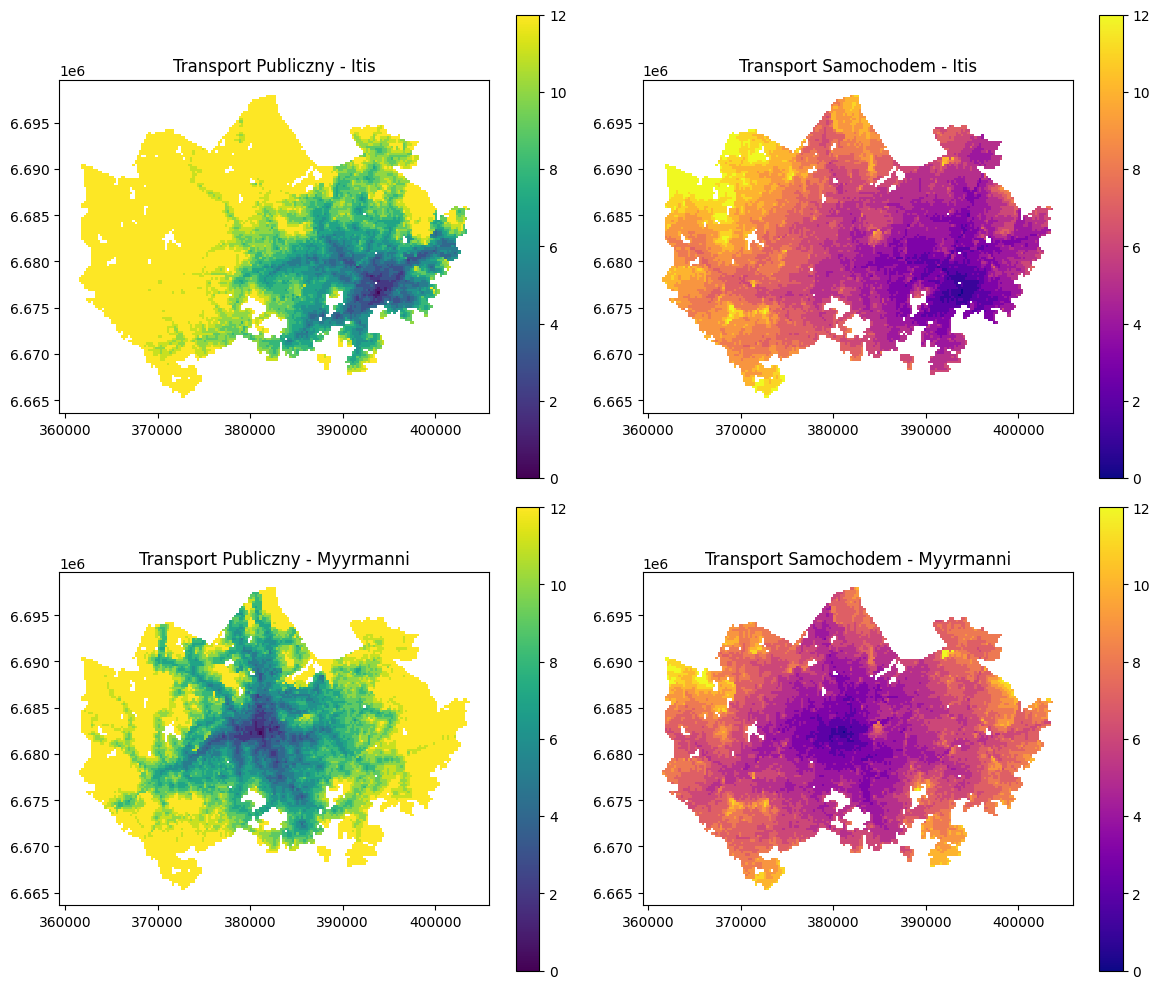

In [63]:
import matplotlib.pyplot as plt

### your code ###
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

grid.plot(column='pt_r_t_cl_Itis', ax=axs[0, 0], legend=True, cmap='viridis')
axs[0, 0].set_title('Transport Publiczny - Itis')

grid.plot(column='car_r_t_cl_Itis', ax=axs[0, 1], legend=True, cmap='plasma')
axs[0, 1].set_title('Transport Samochodem - Itis')

grid.plot(column='pt_r_t_cl_Myyrmanni', ax=axs[1, 0], legend=True, cmap='viridis')
axs[1, 0].set_title('Transport Publiczny - Myyrmanni')

grid.plot(column='car_r_t_cl_Myyrmanni', ax=axs[1, 1], legend=True, cmap='plasma')
axs[1, 1].set_title('Transport Samochodem - Myyrmanni')

plt.tight_layout()

plt.show()

<b>Ćwiczenie 11.</b> Utwórz obiekt typu GeoDataFrame o nazwie grid2, który będzie zawierał następujące kolumny: YTR_ID, geometry, pt_r_t_Jumbo, pt_r_t_Dixi, pt_r_t_Myyrmanni, pt_r_t_Itis, pt_r_t_Forum, pt_r_t_IsoOmena oraz pt_r_t_Ruoholahti. Zamień wszystkie wartości -1 w zmiennej grid2 na NaN, a następnie usuń te rekordy, które zawierają wartości NaN.

In [69]:
### your code ###
grid2 = gpd.read_file('YKR_grid_EPSG3067.gpkg')

travel_times_Jumbo = pd.read_csv('travel_times/travel_times_to_5878070_Jumbo.txt', sep=";")
travel_times_Jumbo = travel_times_Jumbo[['from_id', 'pt_r_t']].rename(columns={'pt_r_t': 'pt_r_t_Jumbo'})
grid2 = grid2.merge(travel_times_Jumbo, left_on='YKR_ID', right_on='from_id', how='left')
grid2 = grid2.drop(['from_id'], axis=1)
travel_times_Dixi = pd.read_csv('travel_times/travel_times_to_5878087_Dixi.txt', sep=";")
travel_times_Dixi = travel_times_Dixi[['from_id', 'pt_r_t']].rename(columns={'pt_r_t': 'pt_r_t_Dixi'})
grid2 = grid2.merge(travel_times_Dixi, left_on='YKR_ID', right_on='from_id', how='left')
grid2 = grid2.drop(['from_id'], axis=1)

travel_times_Myyrmanni = pd.read_csv('travel_times/travel_times_to_5902043_Myyrmanni.txt', sep=";")
travel_times_Myyrmanni = travel_times_Myyrmanni[['from_id', 'pt_r_t']].rename(columns={'pt_r_t': 'pt_r_t_Myyrmanni'})
grid2 = grid2.merge(travel_times_Myyrmanni, left_on='YKR_ID', right_on='from_id', how='left')
grid2 = grid2.drop(['from_id'], axis=1)

travel_times_Itis = pd.read_csv('travel_times/travel_times_to_5944003_Itis.txt', sep=";")
travel_times_Itis = travel_times_Itis[['from_id', 'pt_r_t']].rename(columns={'pt_r_t': 'pt_r_t_Itis'})
grid2 = grid2.merge(travel_times_Itis, left_on='YKR_ID', right_on='from_id', how='left')
grid2 = grid2.drop(['from_id'], axis=1)

travel_times_Forum = pd.read_csv('travel_times/travel_times_to_5975373_Forum.txt', sep=";")
travel_times_Forum = travel_times_Forum[['from_id', 'pt_r_t']].rename(columns={'pt_r_t': 'pt_r_t_Forum'})
grid2 = grid2.merge(travel_times_Forum, left_on='YKR_ID', right_on='from_id', how='left')
grid2 = grid2.drop(['from_id'], axis=1)

travel_times_IsoOmena = pd.read_csv('travel_times/travel_times_to_5978593_Iso_Omena.txt', sep=";")
travel_times_IsoOmena = travel_times_IsoOmena[['from_id', 'pt_r_t']].rename(columns={'pt_r_t': 'pt_r_t_IsoOmena'})
grid2 = grid2.merge(travel_times_IsoOmena, left_on='YKR_ID', right_on='from_id', how='left')
grid2 = grid2.drop(['from_id'], axis=1)

travel_times_Ruoholahti = pd.read_csv('travel_times/travel_times_to_5980260_Ruoholahti.txt', sep=";")
travel_times_Ruoholahti = travel_times_Ruoholahti[['from_id', 'pt_r_t']].rename(columns={'pt_r_t': 'pt_r_t_Ruoholahti'})
grid2 = grid2.merge(travel_times_Ruoholahti, left_on='YKR_ID', right_on='from_id', how='left')
grid2 = grid2.drop(['from_id'], axis=1)


grid2 = grid2[['YKR_ID', 'geometry', 'pt_r_t_Jumbo', 'pt_r_t_Dixi', 'pt_r_t_Myyrmanni', 'pt_r_t_Itis', 'pt_r_t_Forum', 'pt_r_t_IsoOmena', 'pt_r_t_Ruoholahti']]

print(grid2.head())


    YKR_ID                                           geometry  pt_r_t_Jumbo  \
0  5785640  POLYGON ((382000 6697750, 381750 6697750, 3817...           101   
1  5785641  POLYGON ((382250 6697750, 382000 6697750, 3820...           108   
2  5785642  POLYGON ((382500 6697750, 382250 6697750, 3822...           109   
3  5785643  POLYGON ((382750 6697750, 382500 6697750, 3825...           114   
4  5787544  POLYGON ((381250 6697500, 381000 6697500, 3810...            98   

   pt_r_t_Dixi  pt_r_t_Myyrmanni  pt_r_t_Itis  pt_r_t_Forum  pt_r_t_IsoOmena  \
0          102                90          132           110              141   
1          109                93          135           113              143   
2          111                95          137           115              145   
3          115                99          141           119              149   
4           99                83          125           103              134   

   pt_r_t_Ruoholahti  
0                118 

<b>Ćwiczenie 12.</b> Dla każdego rekordu w zmiennej grid2 znajdź najkrótszy czas podróży do centrum handlowego oraz najbliższe centrum handlowe. Rezultaty zapisz w kolumnach min_time oraz shopping_centre.

In [70]:
### your code ###
r = ['pt_r_t_Jumbo', 'pt_r_t_Dixi', 'pt_r_t_Myyrmanni', 'pt_r_t_Itis', 'pt_r_t_Forum', 'pt_r_t_IsoOmena', 'pt_r_t_Ruoholahti']

grid2['min_time'] = grid2[r].min(axis=1)
grid2['shopping_centre'] = grid2[r].idxmin(axis=1)

print(grid2[['YKR_ID', 'min_time', 'shopping_centre']].head())

    YKR_ID  min_time   shopping_centre
0  5785640        90  pt_r_t_Myyrmanni
1  5785641        93  pt_r_t_Myyrmanni
2  5785642        95  pt_r_t_Myyrmanni
3  5785643        99  pt_r_t_Myyrmanni
4  5787544        83  pt_r_t_Myyrmanni


<b>Ćwiczenie 13.</b> Utwórz zestaw wykresów 2x1, gdzie po lewej stronie dla każdego grida będzie zaznaczone najbliższe centrum handlowe, a po prawej stronie najkrótszy czas podróży do centrum handlowego.

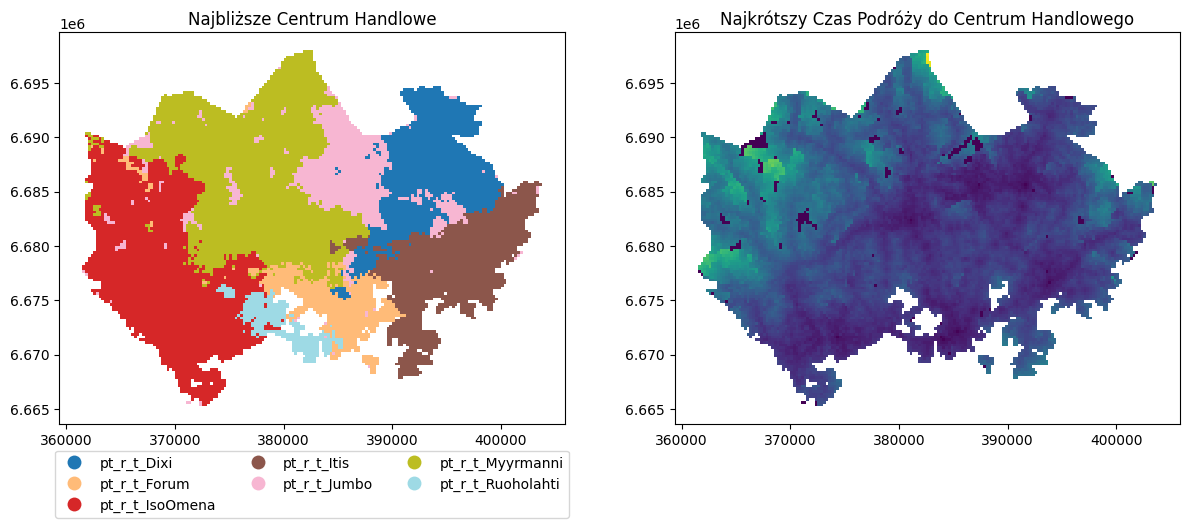

In [84]:
### your code ###
fig, axs = plt.subplots(1, 2, figsize=(12, 10))

grid2.plot(column='shopping_centre', ax=axs[0], legend=True, cmap='tab20', legend_kwds={'loc': 'upper center', 'bbox_to_anchor': (0.5, -0.05), 'ncol': 3})
axs[0].set_title('Najbliższe Centrum Handlowe')


grid2.plot(column='min_time', ax=axs[1], cmap='viridis')
axs[1].set_title('Najkrótszy Czas Podróży do Centrum Handlowego')


plt.tight_layout()
plt.show()